# Using Daymet data from ORNL webservice

Daymet is a a daily gridded weather dataset distributed through the ORNL DAAC
https://daymet.ornl.gov/

As part of their tools for obtaining data they have created a webservice that allows one to download a timeseries of temperature and precipitation for any location in the US.

Functions in Daymetpy allow for painless use of this service
DaymetPy package developed by Koen Hufkens 
https://bitbucket.org/khufkens/daymetpy

In [1]:
import sys
sys.path.append(r"..")

import daymetpy

In [2]:
ornl_lat, ornl_long = 35.9313167, -84.3104124
df = daymetpy.daymet_timeseries(lon=ornl_long, lat=ornl_lat, start_year=2012, end_year=2013)

### Which gives us a nice data frame with weather data for the Oak Ridge National Lab

In [3]:
df.head()

,year,yday,dayl,prcp,srad,swe,tmax,tmin,vp
2012-01-01,2012,1,34560,3.0,204.8,0.0,15.0,0.5,640.0
2012-01-02,2012,2,34560,2.0,278.4,0.0,11.5,-3.0,480.0
2012-01-03,2012,3,34560,0.0,204.8,0.0,1.5,-7.0,360.0
2012-01-04,2012,4,34560,0.0,252.8,0.0,3.0,-8.5,320.0
2012-01-05,2012,5,34906,0.0,288.0,0.0,9.5,-5.5,400.0


## Which we can visualize using matplotlib and seaborn

In [4]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


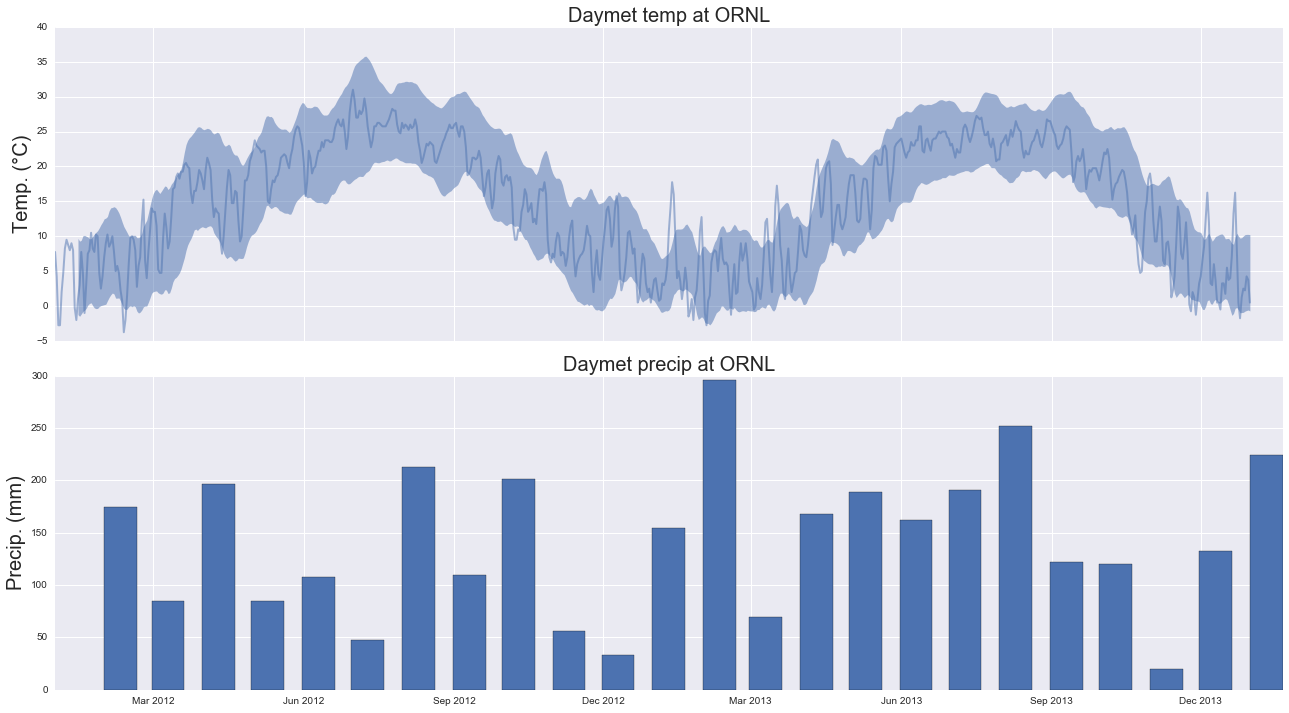

In [5]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2, figsize=(18, 10), sharex=True)
rolling3day = pd.rolling_mean(df, 15)
ax1.fill_between(rolling3day.index, rolling3day.tmin, rolling3day.tmax, alpha=0.5, lw=0)
ax1.plot(df.index, df[['tmax', 'tmin']].mean(axis=1), lw=2, alpha=0.5)

ax1.set_title('Daymet temp at ORNL', fontsize=20)
ax1.set_ylabel(u'Temp. (°C)', fontsize=20)

monthlysum = df.resample("M", how='sum')
ax2.bar(monthlysum.index, monthlysum.prcp, width=20,)
ax2.set_title('Daymet precip at ORNL', fontsize=20)
ax2.set_ylabel(u'Precip. (mm)', fontsize=20)

fig.tight_layout()

# And ask questions such as: "What does the difference in temperature between Denver and Miami look like?"

In [6]:
denver_loc = (-104.9903, 39.7392)
miami_loc = (-80.2089, 25.7753)

denver = daymetpy.daymet_timeseries(lon=denver_loc[0], lat=denver_loc[1], start_year=2012, end_year=2014)
miami = daymetpy.daymet_timeseries(lon=miami_loc[0], lat=miami_loc[1], start_year=2012, end_year=2014)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=15,center=False).mean()


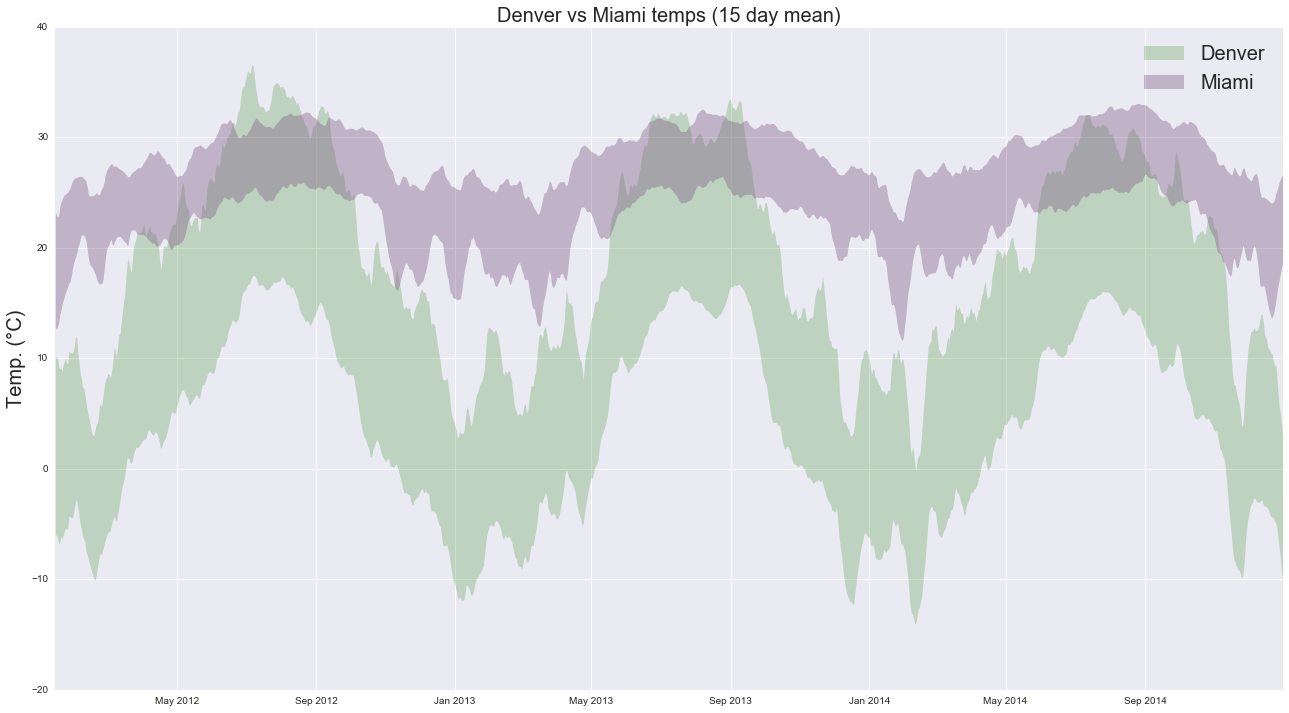

In [7]:
fig, ax1 = plt.subplots(1, figsize=(18, 10))
rolling3day = pd.rolling_mean(denver, 15)
ax1.fill_between(rolling3day.index, rolling3day.tmin, rolling3day.tmax, 
                 alpha=0.4, lw=0, label='Denver', color=sns.xkcd_palette(['faded green'])[0])

ax1.set_title('Denver vs Miami temps (15 day mean)', fontsize=20)

rolling3day = pd.rolling_mean(miami, 15)
ax1.fill_between(rolling3day.index, rolling3day.tmin, rolling3day.tmax, 
                 alpha=0.4, lw=0, label='Miami', color=sns.xkcd_palette(['dusty purple'])[0])

ax1.set_ylabel(u'Temp. (°C)', fontsize=20)
fig.tight_layout()
plt.legend(fontsize=20)